In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
abnb_90 = pd.read_csv('../abnb_df_90_ML.csv')

In [3]:
abnb_nrows = len(abnb_90.index)
abnb_nrows

28127

In [4]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = abnb_90.number_of_reviews.values.reshape(-1, 1)
y = abnb_90.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (28127, 1) (28127, 1)


array([[ 0],
       [ 1],
       [ 0],
       ...,
       [ 7],
       [53],
       [13]], dtype=int64)

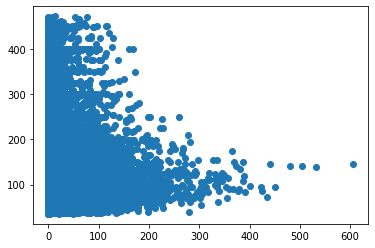

In [5]:
# Plot the data

plt.scatter(X, y)


In [6]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
# Fit the model to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.0682594]]
y-axis intercept:  [130.32046427]


In [9]:
 # Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[605]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

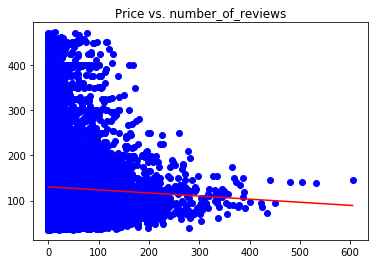

In [11]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("Price vs. number_of_reviews")

plt.savefig('linear_reg_numReviews.png')

In [12]:
# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print (model.score(X, y), 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

0.0010985314146136904 0.0010630149179529091


In [13]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()
#print dir(result)
print (result.rsquared, result.rsquared_adj

SyntaxError: unexpected EOF while parsing (<ipython-input-13-a68d350c7c98>, line 6)